# Deteksi dan Klasifikasi Motif Batik

# Proses Download Dataset

- Pastikan file kaggle.json sudah diunggah ke Colab

In [ ]:
from google.colab import files
files.upload()

Saving dataset.zip to dataset.zip


- Tempatkan kaggle.json pada folder konfigurasi

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


- Download dataset batik dari Kaggle

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d dionisiusdh/indonesian-batik-motifs

Dataset URL: https://www.kaggle.com/datasets/dionisiusdh/indonesian-batik-motifs
License(s): CC0-1.0
100% 262M/262M [00:10<00:00, 30.8MB/s]
100% 262M/262M [00:10<00:00, 26.7MB/s]


- Ekstrak file zip dataset ke folder tujuan

In [ ]:
import zipfile
import os

file_zip = "indonesian-batik-motifs.zip"
dir_ekstrak = "/content/kaggle/input/indonesian-batik-motifs"

os.makedirs(dir_ekstrak, exist_ok=True)

with zipfile.ZipFile(file_zip, 'r') as zip_ref:
    zip_ref.extractall(dir_ekstrak)

print(f"Data berhasil diekstrak ke: {dir_ekstrak}")


Dataset berhasil diekstrak ke: /content/kaggle/input/indonesian-batik-motifs


# Persiapan dan Analisis Data

- Membuat daftar file gambar dan label kategori

In [ ]:
daftar_gambar = []
daftar_kategori = []
import os
for root, _, files in os.walk('/content/kaggle/input/indonesian-batik-motifs/'):
    for f in files:
        daftar_gambar.append(os.path.join(root, f).split('/')[-1])
        daftar_kategori.append(os.path.join(root, f).split('/')[-2])

# Setup Library dan Model CNN Sederhana

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model_batik = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # Contoh: 5 kelas
])

model_batik.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Konversi Label ke Bentuk Numerik

In [ ]:
label_unik = np.unique(daftar_kategori)
indeks_label = np.arange(0, len(daftar_kategori))
pemetaan_label = dict(zip(label_unik, indeks_label))
pemetaan_label

{'batik-bali': 0,
 'batik-betawi': 1,
 'batik-celup': 2,
 'batik-cendrawasih': 3,
 'batik-ceplok': 4,
 'batik-ciamis': 5,
 'batik-garutan': 6,
 'batik-gentongan': 7,
 'batik-kawung': 8,
 'batik-keraton': 9,
 'batik-lasem': 10,
 'batik-megamendung': 11,
 'batik-parang': 12,
 'batik-pekalongan': 13,
 'batik-priangan': 14,
 'batik-sekar': 15,
 'batik-sidoluhur': 16,
 'batik-sidomukti': 17,
 'batik-sogan': 18,
 'batik-tambal': 19}

# Cek dan Filter Gambar Rusak

In [ ]:
import os
import pandas as pd
from PIL import Image, UnidentifiedImageError
FOLDER_DATA = "/content/kaggle/input/indonesian-batik-motifs/"

df_data = pd.DataFrame({'image_id': daftar_gambar, 'label': daftar_kategori})

# Deteksi file gambar yang tidak bisa dibuka
indeks_error = []
for i in range(len(df_data)):
    try:
        Image.open(FOLDER_DATA + str(df_data['label'].values[i]) + '/' + str(df_data['image_id'].values[i]))
    except UnidentifiedImageError:
        indeks_error.append(i)

df_bersih = df_data.drop(indeks_error)
df_bersih.head()

,image_id,label
0,49.jpg,batik-sekar
1,9.jpg,batik-sekar
2,19.jpg,batik-sekar
3,11.jpg,batik-sekar
4,16.jpg,batik-sekar


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

FOLDER_DATA = "/content/kaggle/input/indonesian-batik-motifs/"

kategori_batik = []
jml_per_kategori = []

for folder in os.listdir(FOLDER_DATA):
    if os.path.isdir(os.path.join(FOLDER_DATA, folder)):
        kategori_batik.append(folder)
        jml_per_kategori.append(len(os.listdir(os.path.join(FOLDER_DATA, folder))))

df_stat = pd.DataFrame({'Kategori': kategori_batik, 'Jumlah': jml_per_kategori})
df_stat['Persentase'] = (df_stat['Jumlah'] / df_stat['Jumlah'].sum()) * 100

print(df_stat)

             Kategori  Jumlah  Persentase
0         batik-sekar      47    4.781282
1         batik-sogan      50    5.086470
2         batik-lasem      50    5.086470
3        batik-ceplok      48    4.883011
4   batik-megamendung      47    4.781282
5      batik-priangan      50    5.086470
6        batik-parang      50    5.086470
7       batik-garutan      50    5.086470
8       batik-keraton      50    5.086470
9     batik-sidomukti      46    4.679552
10       batik-ciamis      50    5.086470
11       batik-tambal      50    5.086470
12  batik-cendrawasih      50    5.086470
13    batik-gentongan      50    5.086470
14    batik-sidoluhur      50    5.086470
15         batik-bali      50    5.086470
16   batik-pekalongan      50    5.086470
17       batik-kawung      45    4.577823
18        batik-celup      50    5.086470
19       batik-betawi      50    5.086470


# Visualisasi Distribusi Kategori

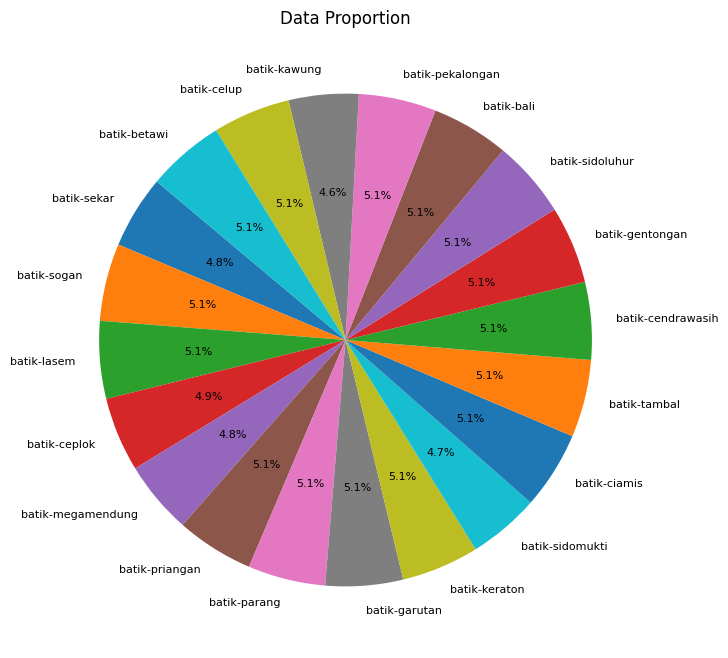

In [ ]:
# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_stat['Persentase'], labels=df_stat['Kategori'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Distribusi Data Batik')
plt.show()


# Statistik Label dan Split Data

In [ ]:
print(df_data.head())
print(df_data.columns)
print(df_data['label'].value_counts())

  image_id        label
0   49.jpg  batik-sekar
1    9.jpg  batik-sekar
2   19.jpg  batik-sekar
3   11.jpg  batik-sekar
4   16.jpg  batik-sekar
Index(['image_id', 'label'], dtype='object')
label
batik-ciamis         50
batik-sogan          50
batik-celup          50
batik-pekalongan     50
batik-bali           50
batik-sidoluhur      50
batik-gentongan      50
batik-cendrawasih    50
batik-tambal         50
batik-betawi         50
batik-keraton        50
batik-garutan        50
batik-parang         50
batik-priangan       50
batik-lasem          50
batik-ceplok         48
batik-megamendung    47
batik-sekar          47
batik-sidomukti      46
batik-kawung         45
Name: count, dtype: int64


# Konfigurasi Data Generator dan Augmentasi


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import load_img, img_to_array

# Konstanta
UKURAN_INPUT = (224, 224)
BATCH_SIZE = 32
TOTAL_KELAS = 20

augmentasi_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

augmentasi_val = ImageDataGenerator(rescale=1./255)

train_folder = '/content/kaggle/input/indonesian-batik-motifs'

train_gen = augmentasi_train.flow_from_directory(
    train_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

val_folder = '/content/kaggle/input/indonesian-batik-motifs'

val_gen = augmentasi_val.flow_from_directory(
    val_folder,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')

Found 983 images belonging to 20 classes.
Found 983 images belonging to 20 classes.


# Visualisasi Sampel Data Latih

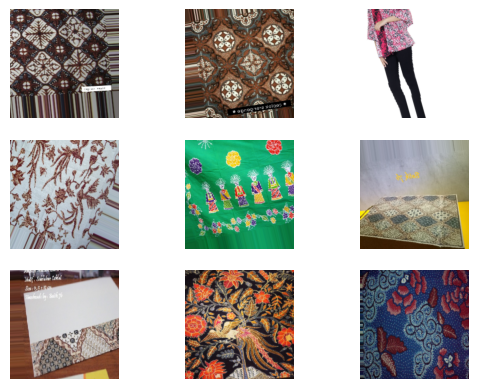

In [ ]:
import matplotlib.pyplot as plt
contoh_gambar, _ = next(train_gen)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(contoh_gambar[i])
    plt.axis('off')
plt.show()

# Visualisasi Sampel Data Validasi

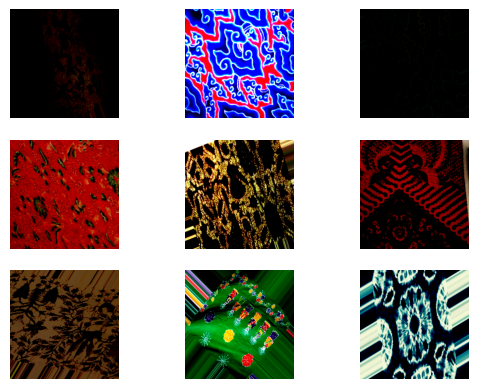

In [ ]:
# Visualisasi beberapa gambar dari validation set
contoh_val, _ = next(val_gen)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(contoh_val[i])
    plt.axis('off')
plt.show()

# Transfer Learning dan Fine Tuning

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def arsitektur_model(jml_kelas):
    base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    for layer in base.layers[-80:]:
        layer.trainable = True

    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.4)(x)
    output = Dense(jml_kelas, activation='softmax', kernel_regularizer=l2(0.01))(x)

    model = Model(inputs=base.input, outputs=output)
    return model

model = arsitektur_model(TOTAL_KELAS)
opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

cb = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=4, verbose=1),
]

history = model.fit(
    train_gen,
    epochs=40,
    validation_data=val_gen,
    callbacks=cb,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 281s 8s/step - accuracy: 0.0553 - loss: 4.0588 - val_accuracy: 0.1478 - val_loss: 3.6172 - learning_rate: 1.0000e-04
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 308s 9s/step - accuracy: 0.1771 - loss: 3.1457 - val_accuracy: 0.2090 - val_loss: 3.4872 - learning_rate: 1.0000e-04
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.2668 - loss: 2.8296 - val_accuracy: 0.2396 - val_loss: 3.4037 - learning_rate: 1.0000e-04
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 295s 9s/step - accuracy: 0.3340 - loss: 2.5630 - val_accuracy: 0.2691 - val_loss: 3.2132 - learning_rate: 1.0000e-04
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 317s 9s/step - accuracy: 0.4242 - loss: 2.2671 - val_accuracy: 0.3048 - val_loss: 2.9865 - learning_rate: 1.0000e-04
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 260s 8s/step - accuracy: 0.4448 - loss: 2.1906 - val_accuracy: 0.3384 - val_loss: 2.7748 - learning_rate: 1.0000e-04
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.5025 - loss: 1.9

# Evaluasi dan Prediksi Model

Saving 9.jpg to 9.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Kemiripan Pola Batik:
1. batik-betawi - Kemiripan: 97.67%
2. batik-sekar - Kemiripan: 1.01%
3. batik-lasem - Kemiripan: 0.57%


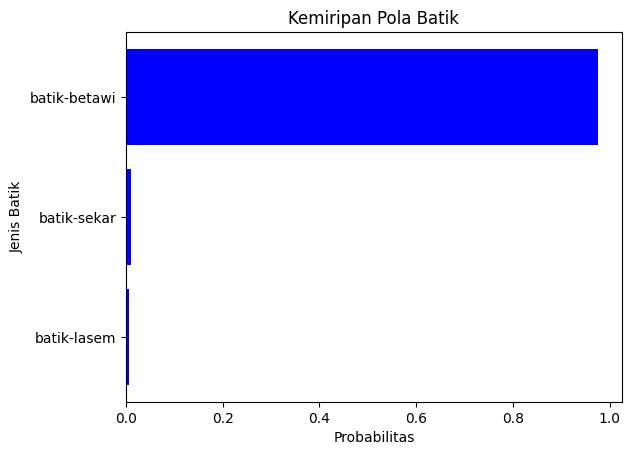

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]

label_dict = {
    0: 'batik-bali',
    1: 'batik-betawi',
    2: 'batik-celup',
    3: 'batik-cendrawasih',
    4: 'batik-ceplok',
    5: 'batik-ciamis',
    6: 'batik-garutan',
    7: 'batik-gentongan',
    8: 'batik-kawung',
    9: 'batik-keraton',
    10: 'batik-lasem',
    11: 'batik-megamendung',
    12: 'batik-parang',
    13: 'batik-pekalongan',
    14: 'batik-priangan',
    15: 'batik-sekar',
    16: 'batik-sidoluhur',
    17: 'batik-sidomukti',
    18: 'batik-sogan',
}

def proses_gambar(path, target_size=(224, 224)):
    img = load_img(path, target_size=target_size)
    arr = img_to_array(img)
    arr = np.expand_dims(arr, axis=0)
    arr = arr / 255.0
    return arr

def prediksi_batik(model, path, top_n=4):
    arr = proses_gambar(path)
    pred = model.predict(arr)
    prob = pred[0]
    idx_atas = np.argsort(prob)[-top_n:][::-1]
    prob_atas = prob[idx_atas]

    print("Prediksi Batik Paling Mirip:")
    for i, idx in enumerate(idx_atas):
        print(f"{i+1}. {label_dict[idx]} - {prob_atas[i]*100:.2f}%")

    plt.barh([label_dict[i] for i in idx_atas[::-1]], prob_atas[::-1], color='green')
    plt.xlabel('Probabilitas')
    plt.ylabel('Jenis Batik')
    plt.title('Prediksi Batik')
    plt.show()

model.save('/content/model_batik.h5')
prediksi_batik(model, img_path)

# Konversi Model ke TensorFlow.js

In [ ]:
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [ ]:
!tensorflowjs_converter --input_format=keras best_model.h5 tfjs_model2

2024-12-08 13:19:29.741950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733663969.803710   56588 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733663969.817801   56588 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-package

In [ ]:
!zip -r tfjs2.zip tfjs_model2/

	zip warning: name not matched: tfjs_model2/

zip error: Nothing to do! (try: zip -r tfjs2.zip . -i tfjs_model2/)


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('model_batik.h5')
model.save('model_batik.h5')